# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [1]:
id1 = "316390053"
id2 = "315022103"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
#df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [4]:
df = pd.DataFrame([id1,id2])

In [5]:
df.to_clipboard(index=False,header=False)

---

----

In [6]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Q1 

In [8]:
data.groupby(['region', 'year'])['total_sold'].sum().unstack()

year,2015,2016,2017,2018
region,,,,
Albany,4.029896e+06,5.264336e+06,5.231582e+06,1.541986e+06
Atlanta,2.323170e+07,2.832688e+07,2.881512e+07,8.231422e+06
BaltimoreWashington,4.064558e+07,4.089380e+07,4.101563e+07,1.215890e+07
Boise,3.784357e+06,4.653510e+06,4.760561e+06,1.214760e+06
Boston,2.745499e+07,3.057132e+07,3.061067e+07,8.637006e+06
BuffaloRochester,5.893235e+06,7.205112e+06,7.740306e+06,2.123818e+06
California,3.014074e+08,3.261884e+08,3.176445e+08,8.374131e+07
Charlotte,9.487343e+06,1.058672e+07,1.189559e+07,3.585890e+06
Chicago,4.149472e+07,3.961264e+07,4.098075e+07,1.161423e+07


# Q2

In [9]:
dfBos=data[data.loc[:,'region'].str.contains('Boston')]
dfBos=dfBos[dfBos['year']==2016]
dfBos
#ישנם 104 שורות בדאטה פריים החדש של בוסטון 2016


,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3016,0,25/12/2016,1.28,447600.75,4349.63,346516.32,4183.69,92551.11,91481.59,1069.52,0.00,conventional,2016,Boston
3017,1,18/12/2016,1.09,579577.33,6123.84,488107.01,7765.43,77581.05,76135.49,1445.56,0.00,conventional,2016,Boston
3018,2,11/12/2016,1.22,510800.58,3711.20,409645.98,5052.84,92390.56,90449.44,1634.18,306.94,conventional,2016,Boston
3019,3,04/12/2016,1.26,473428.36,4371.95,393748.18,3449.16,71859.07,71377.77,307.69,173.61,conventional,2016,Boston
3020,4,27/11/2016,1.45,391257.01,4243.20,317090.39,3069.37,66854.05,66399.33,31.11,423.61,conventional,2016,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12188,47,31/01/2016,1.52,8221.86,6.99,553.02,0.00,7661.85,7494.27,167.58,0.00,organic,2016,Boston
12189,48,24/01/2016,1.46,8850.23,6.98,616.39,0.00,8226.86,8226.86,0.00,0.00,organic,2016,Boston
12190,49,17/01/2016,1.13,9327.19,14.36,743.11,0.00,8569.72,8569.72,0.00,0.00,organic,2016,Boston
12191,50,10/01/2016,1.32,7751.94,65.96,766.46,1.20,6918.32,6918.32,0.00,0.00,organic,2016,Boston


# Q3

In [10]:
dfBos['total_sold'].mean()
#ממוצע המכירות היומי 293954.952596154 יחידות אבוקדו

293954.952596154

# Q4

In [19]:
dfBos['Date'] = pd.to_datetime(dfBos.Date)
dfBos['month'] = pd.DatetimeIndex(dfBos.Date).month
dfBos9=dfBos[dfBos['month']==9]
dfBos9["Total Bags"].sum()

324630.4

# Q5

In [14]:
data.groupby('type')[['total_sold']].sum()

,total_sold
type,
conventional,1.508722e+10
organic,4.361817e+08


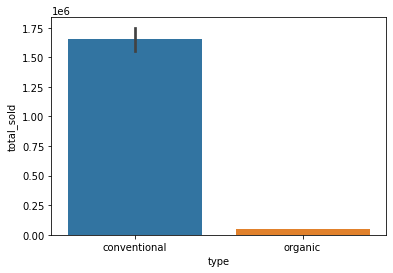

In [15]:
ax = sns.barplot(x="type", y="total_sold", data=data)

# Q6

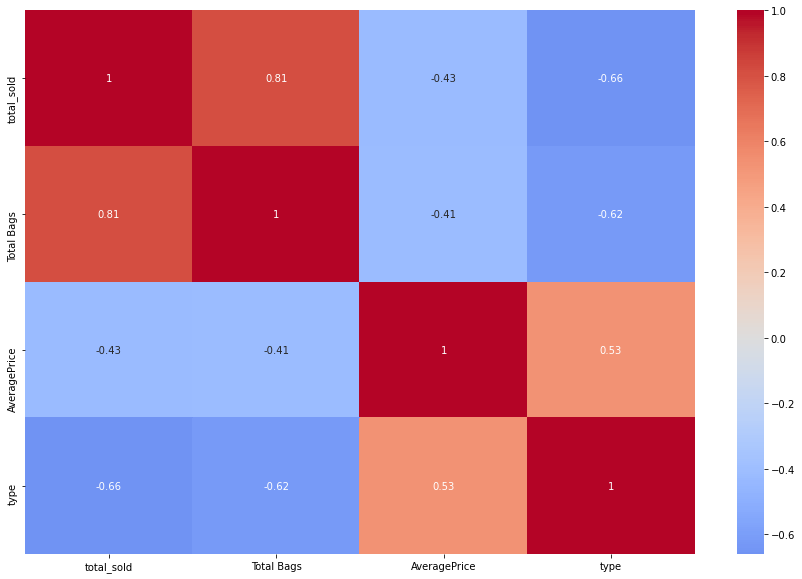

In [20]:
features = ['total_sold', 'Total Bags', 'AveragePrice', 'type']
data['type']=data['type'].astype('category').cat.codes
#type - 1-conventional 0-organic
corrs = data[features].corr(method = 'kendall')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

# Q7

<AxesSubplot:xlabel='Total Bags', ylabel='total_sold'>

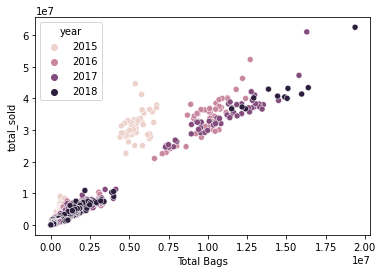

In [21]:
sns.scatterplot(data=data, x="Total Bags", y="total_sold",hue='year')

---
# GOOD LUCK !!!!
---

In [ ]:
# do not type below this line